# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
df = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

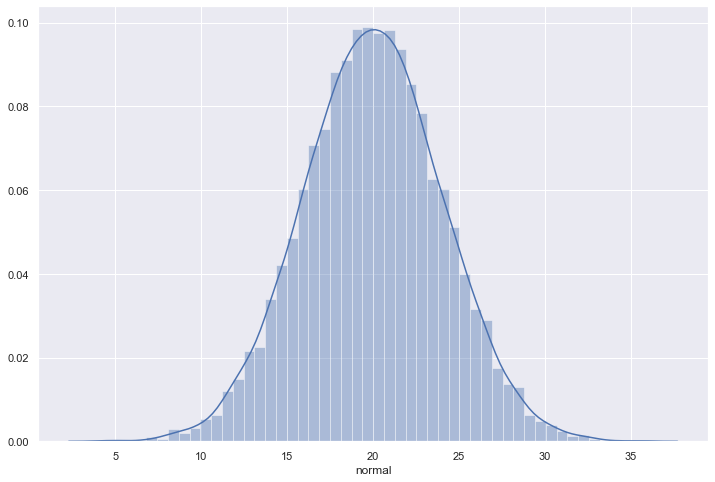

In [4]:
# Sua análise da parte 1 começa aqui.
sns.distplot(df.normal)

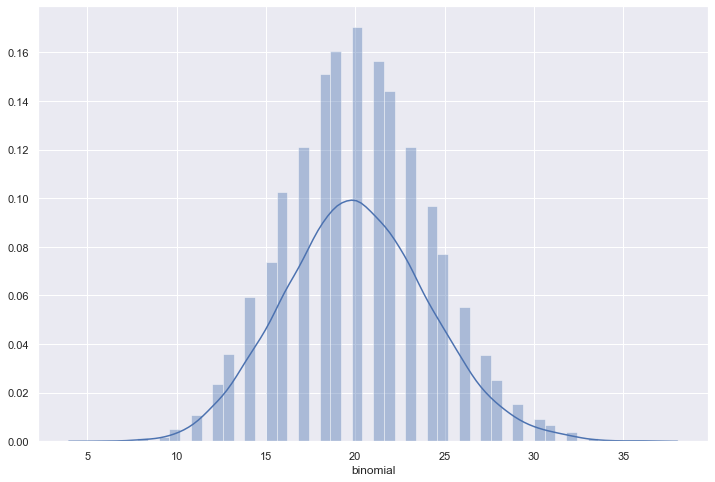

In [5]:
sns.distplot(df.binomial)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [6]:
a1=df.normal.describe()[['25%','50%','75%']].values
b1=df.binomial.describe()[['25%','50%','75%']].values

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    ans1=a1-b1
    return tuple(np.around(ans1,decimals=3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
a2=df.normal.mean()-df.normal.std()
b2=df.normal.mean()+df.normal.std()

In [9]:
## Empirico
c2=df.normal[df.normal>=a2][df.normal<=b2].size
ans2=c2/df.normal.size
ans2

0.6838

In [10]:
## Teórico
sct.norm.cdf(b2,loc=20,scale=4) - sct.norm.cdf(a2,loc=20,scale=4)

0.684361076857501

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return np.round(ans2,decimals=3)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [14]:
b3=df.binomial.std()**2 - df.normal.std()**2

In [15]:
a3= df.binomial.mean() - df.normal.mean()

In [16]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return tuple(np.around([a3,b3],decimals=3).tolist())

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [17]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [18]:
# Sua análise da parte 2 começa aqui.
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [19]:
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [37]:
false_pulsar_mean_profile_standardized=(stars.mean_profile[stars.target==0]-stars.mean_profile[stars.target==0].mean())/stars.mean_profile[stars.target==0].std()

In [41]:
ecdf=ECDF(false_pulsar_mean_profile_standardized)

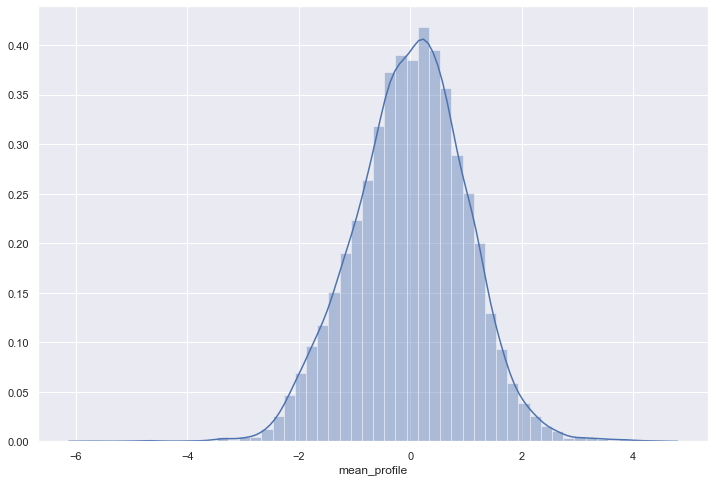

In [21]:
sns.distplot(false_pulsar_mean_profile_standardized)

In [42]:
##Quantis Teóricos
q80t=sct.norm.ppf(0.8,loc=0,scale=1)
q90t=sct.norm.ppf(0.9)
q95t=sct.norm.ppf(0.95)

pd.Series({'80%':q80t, '90%':q90t,'95%':q95t})

In [46]:
##Quantis empíricos
q80e=ecdf(q80t)
q90e=ecdf(q90t)
q95e=ecdf(q95t)

In [47]:
ans4=np.around([q80e,q90e,q95e],decimals=3)
tuple(ans4)

(0.806, 0.911, 0.959)

In [48]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return tuple(ans4)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [26]:
#Quantis Empiricos
[Q1E,Q2E,Q3E]=false_pulsar_mean_profile_standardized.describe()[['25%','50%','75%']]

In [27]:
#Quantis Teóricos
Q1t=sct.norm.ppf(0.25)
Q2t=sct.norm.ppf(0.5)
Q3t=sct.norm.ppf(0.75)

In [29]:
def q5():
    # Retorne aqui o resultado da questão 5.
    ans3=np.around([Q1E-Q1t,Q2E-Q2t,Q3E-Q3t],decimals=3)
    return tuple(ans3)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.